# Getting started to pm4py 

API documentation: https://pm4py.fit.fraunhofer.de/static/assets/api/2.5.0/api.html

This tutorial is based on: https://pm4py.fit.fraunhofer.de/static/assets/api/2.5.0/getting_started.html

This tutorial is divided into 4 parts:
1. Install **pm4py**
2. **Import**, **explore** and **preprocess** an XES event log
3. **Discover** a process model
4. **Performance analysis**

Let's start 🚀

## Install pm4py

In [64]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


If you are working locally, you'll need to install graphviz, the library used by pm4py to visualize process models.

1.   Install Windows package from: https://graphviz.org/download/
2.   Install python graphviz package using: `pip install graphviz`
3. Add `C:\Program Files\Graphviz2.38\bin` to `User path`
4. Add `C:\Program Files\Graphviz2.38\bin\dot.exe` to `System path`



## Import & Preprocess Event log

Event logs can be either in [XES](https://xes-standard.org/) or CSV format. In order for the event log to be properly read and analyzed by pm4py, it must contain at least the `case id`, `activity name`, and `timestamp` attributes. These attributes are used to identify the unique cases, the specific activities that were performed, and the order in which they were performed.

Let's import the XES event log `running-example.xes` using `pm4py.read_xes() `.

First, **upload the .xes file to your notebook environment**.

Then you will need to `import pm4py`.

In [65]:
import pm4py

log = pm4py.read_xes('running-example.xes')
log

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name,case:creator
0,register request,Pete,2010-12-30 13:32:00+00:00,register request,Pete,50,3,Fluxicon Nitro
1,examine casually,Mike,2010-12-30 14:06:00+00:00,examine casually,Mike,400,3,Fluxicon Nitro
2,check ticket,Ellen,2010-12-30 15:34:00+00:00,check ticket,Ellen,100,3,Fluxicon Nitro
3,decide,Sara,2011-01-06 08:18:00+00:00,decide,Sara,200,3,Fluxicon Nitro
4,reinitiate request,Sara,2011-01-06 11:18:00+00:00,reinitiate request,Sara,200,3,Fluxicon Nitro
5,examine thoroughly,Sean,2011-01-06 12:06:00+00:00,examine thoroughly,Sean,400,3,Fluxicon Nitro
6,check ticket,Pete,2011-01-08 10:43:00+00:00,check ticket,Pete,100,3,Fluxicon Nitro
7,decide,Sara,2011-01-09 08:55:00+00:00,decide,Sara,200,3,Fluxicon Nitro
8,pay compensation,Ellen,2011-01-15 09:45:00+00:00,pay compensation,Ellen,200,3,Fluxicon Nitro
9,register request,Mike,2010-12-30 10:32:00+00:00,register request,Mike,50,2,Fluxicon Nitro


The `log` object is a [pandas](https://pandas.pydata.org/) dataframe. Pandas is a popular python library for data manipulation and analysis. It provides powerful data structures, including the DataFrame and Series, which allow for easy handling and manipulation of large amounts of data. It also offers a wide range of tools for data cleaning, filtering, and transformation, as well as powerful data visualization capabilities through integration with libraries such as Matplotlib and Seaborn. 

Let's check what's inside the log 👀

Each row in the dataframe corresponds to an event. An event has multiple attributes. The mandatory ones are `concept:name` which is the activity name, `time:timestamp` which is the time at which the activity is executed and `case:concept:name` which is the case identifier.

Let's explore the log by answering the following questions 🤔:
1. How the events are distributed over time?
2. What is the trace of the case id 3?
3. How many traces are there in the log? how many events?
4. How many distinct activities are there in the log? List them
5. What activities occur first, and what activities occur last in the traces?
6. What are the variants (identical traces) and their frequencies?

**1. How the events are distributed over time?**

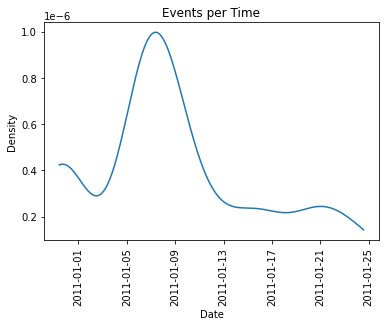

In [66]:
pm4py.view_events_per_time_graph(log, format='png')

**2. What is the trace of the case id 3?**

In [67]:
trace = log[log['case:concept:name']=='3']

In [68]:
trace

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name,case:creator
0,register request,Pete,2010-12-30 13:32:00+00:00,register request,Pete,50,3,Fluxicon Nitro
1,examine casually,Mike,2010-12-30 14:06:00+00:00,examine casually,Mike,400,3,Fluxicon Nitro
2,check ticket,Ellen,2010-12-30 15:34:00+00:00,check ticket,Ellen,100,3,Fluxicon Nitro
3,decide,Sara,2011-01-06 08:18:00+00:00,decide,Sara,200,3,Fluxicon Nitro
4,reinitiate request,Sara,2011-01-06 11:18:00+00:00,reinitiate request,Sara,200,3,Fluxicon Nitro
5,examine thoroughly,Sean,2011-01-06 12:06:00+00:00,examine thoroughly,Sean,400,3,Fluxicon Nitro
6,check ticket,Pete,2011-01-08 10:43:00+00:00,check ticket,Pete,100,3,Fluxicon Nitro
7,decide,Sara,2011-01-09 08:55:00+00:00,decide,Sara,200,3,Fluxicon Nitro
8,pay compensation,Ellen,2011-01-15 09:45:00+00:00,pay compensation,Ellen,200,3,Fluxicon Nitro


**3. How many traces are there in the log? how many events?**

In [69]:
nb_events = len(log) #length of the dataframe
nb_events

42

In [70]:
nb_traces = len(log['case:concept:name'].unique()) #length of the unique values of the case:concept:name column
nb_traces

6

**4. How many distinct activities are there in the log? List them**

In [71]:
unique_activities = log['concept:name'].unique()
print("There are {} unique activities".format(len(unique_activities)))
print(unique_activities)

There are 8 unique activities
['register request' 'examine casually' 'check ticket' 'decide'
 'reinitiate request' 'examine thoroughly' 'pay compensation'
 'reject request']


**5. What activities occur first, and what activities occur last in the traces?**

In [72]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)

print("start activities: ", start_activities)
print("end activities: ", end_activities)

start activities:  {'register request': 6}
end activities:  {'pay compensation': 3, 'reject request': 3}


**6. What are the variants (identical traces) and their frequencies?**

In [73]:
variants = pm4py.get_variants(log)
variants

{('register request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'check ticket',
  'examine casually',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'pay compensation'): 1,
 ('register request',
  'check ticket',
  'examine thoroughly',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'check ticket',
  'examine casually',
  'decide',
  'reinitiate request',
  'examine casually',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'pay compensation'): 1}

In [74]:
#traces that end with pay compensate

**Let's now do some preprocessing to our log before we proceed.**

### Built-in filtering in pm4py

Let's say that we're only interested in:
1. Analyzing the traces that end with the activity "reject request".
2. Analyzing the activities performed by "Pete" and "Mike"
3. Analyzing the traces that were executed in 2011 

**1. Filter in the traces that end with the activity "reject request"**

In [75]:
filtered_log = pm4py.filter_end_activities(log, ['reject request'])
filtered_variants = pm4py.get_variants(filtered_log)
filtered_variants

{('register request',
  'examine thoroughly',
  'check ticket',
  'decide',
  'reject request'): 1,
 ('register request',
  'check ticket',
  'examine thoroughly',
  'decide',
  'reject request'): 1,
 ('register request',
  'examine casually',
  'check ticket',
  'decide',
  'reinitiate request',
  'check ticket',
  'examine casually',
  'decide',
  'reinitiate request',
  'examine casually',
  'check ticket',
  'decide',
  'reject request'): 1}

**2. Keep only the activities that are performed by "Pete" and "Mike"**

In [76]:
filtered_log = pm4py.filter_event_attribute_values(log, 'org:resource', {'Pete', 'Mike'}, level='event')
filtered_log

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name,case:creator
0,register request,Pete,2010-12-30 13:32:00+00:00,register request,Pete,50,3,Fluxicon Nitro
1,examine casually,Mike,2010-12-30 14:06:00+00:00,examine casually,Mike,400,3,Fluxicon Nitro
6,check ticket,Pete,2011-01-08 10:43:00+00:00,check ticket,Pete,100,3,Fluxicon Nitro
9,register request,Mike,2010-12-30 10:32:00+00:00,register request,Mike,50,2,Fluxicon Nitro
10,check ticket,Mike,2010-12-30 11:12:00+00:00,check ticket,Mike,100,2,Fluxicon Nitro
14,register request,Pete,2010-12-30 10:02:00+00:00,register request,Pete,50,1,Fluxicon Nitro
16,check ticket,Mike,2011-01-05 14:12:00+00:00,check ticket,Mike,100,1,Fluxicon Nitro
18,reject request,Pete,2011-01-07 13:24:00+00:00,reject request,Pete,200,1,Fluxicon Nitro
19,register request,Mike,2011-01-06 14:02:00+00:00,register request,Mike,50,6,Fluxicon Nitro
21,check ticket,Mike,2011-01-07 15:22:00+00:00,check ticket,Mike,100,6,Fluxicon Nitro


**3. Filter in the traces that were executed in 2011**

In [77]:
import datetime as dt

filtered_log = pm4py.filter_time_range(log, dt.datetime(2011, 1, 1), dt.datetime(2011, 12, 31),
                                       mode='traces_contained')
filtered_log

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name,case:creator
19,register request,Mike,2011-01-06 14:02:00+00:00,register request,Mike,50,6,Fluxicon Nitro
20,examine casually,Ellen,2011-01-06 15:06:00+00:00,examine casually,Ellen,400,6,Fluxicon Nitro
21,check ticket,Mike,2011-01-07 15:22:00+00:00,check ticket,Mike,100,6,Fluxicon Nitro
22,decide,Sara,2011-01-07 15:52:00+00:00,decide,Sara,200,6,Fluxicon Nitro
23,pay compensation,Mike,2011-01-16 10:47:00+00:00,pay compensation,Mike,200,6,Fluxicon Nitro
24,register request,Ellen,2011-01-06 08:02:00+00:00,register request,Ellen,50,5,Fluxicon Nitro
25,examine casually,Mike,2011-01-07 09:16:00+00:00,examine casually,Mike,400,5,Fluxicon Nitro
26,check ticket,Pete,2011-01-08 10:22:00+00:00,check ticket,Pete,100,5,Fluxicon Nitro
27,decide,Sara,2011-01-10 12:28:00+00:00,decide,Sara,200,5,Fluxicon Nitro
28,reinitiate request,Sara,2011-01-11 15:18:00+00:00,reinitiate request,Sara,200,5,Fluxicon Nitro


## Discover a BPMN model

We will automatically discover a BPMN model from our log. There exists a plenty of [disocvery algorithms](https://www.processmining.org/process-discovery.html). In this tutorial we will use an algoritm called **inductive-miner** which allows us to discover a BPMN model.

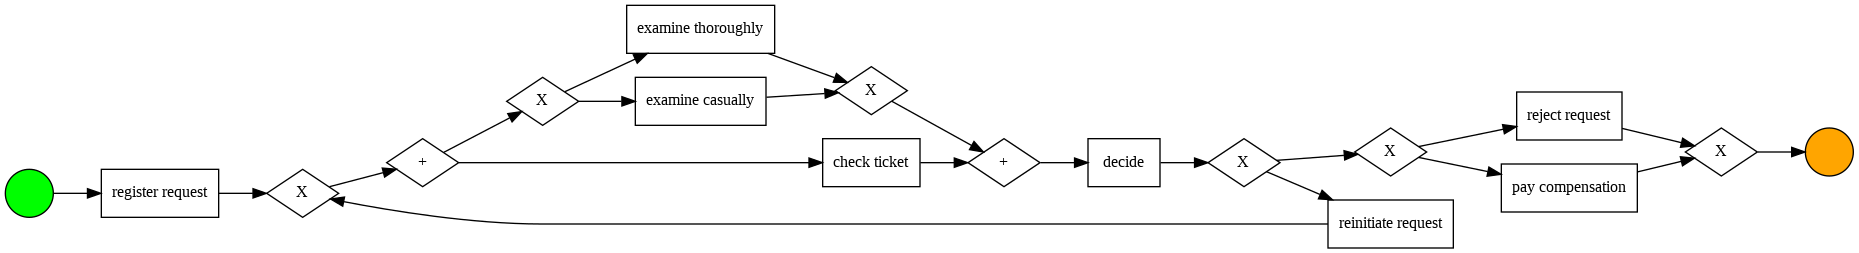

In [79]:
bpmn_model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(bpmn_model)

### Performance analysis

Visualize a less formal model called **Directly-follows graph (DFG)** or **process map**

<ipython-input-96-e8e9737c1b49>:1: DeprecatedWarning: discover_directly_follows_graph is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(log)


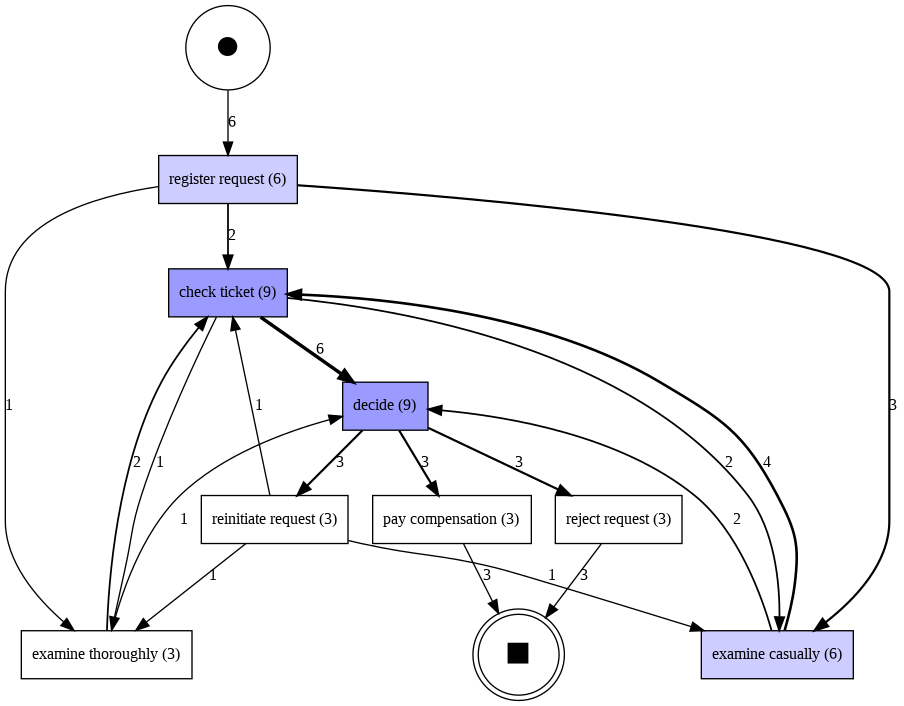

In [96]:
dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

Analyze the performance of the traces and visualize the result on the DFG

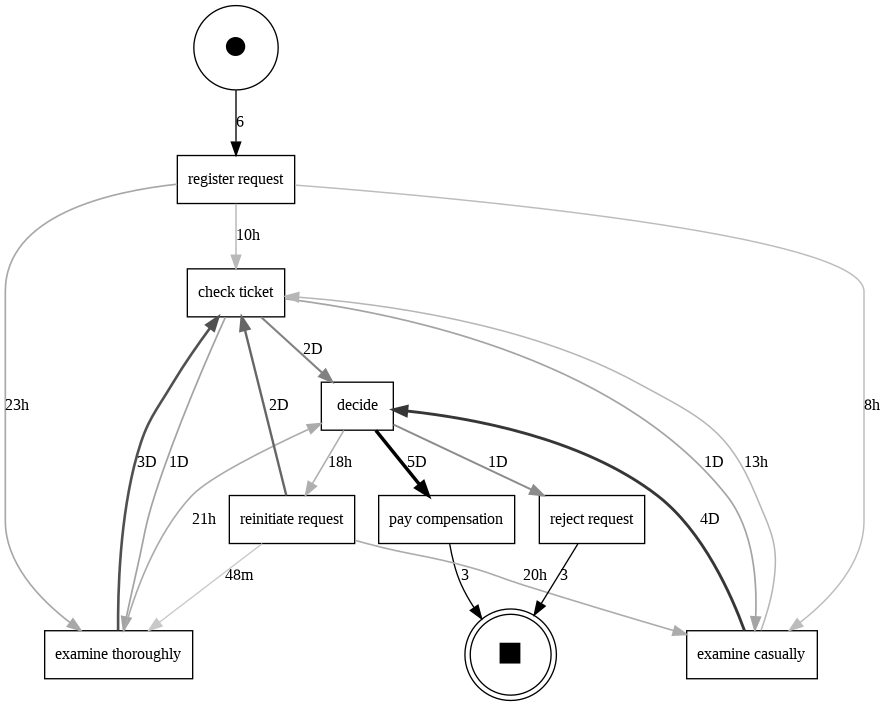

In [97]:
dfg, start_activity, end_activity = pm4py.discover_performance_dfg(log)
pm4py.view_performance_dfg(dfg, start_activity, end_activity)